# Why SSH doesn't work well with 12_2cnv?

   - test 1 : donner ug,vg a un modele pré-entrainé avec u,v  (12_2conv_uv)
  - test 2 : entrainer un modele à predire drift partir de ug, vg (12_2conv_ug)
  - test 3 : entrainer from SSH mais en frisant la composante u,v (réutilisant 12_2conv_uv preentrainé)
   - test 4: complexifier le pretraitement 2—> 4 conv en entrée.
   - test 5 : SSH + SST mais sans doute avec plus de couches (4)

In [2]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
from myfuncts2  import *
import myfuncts 
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

## Test 1:  feed geo current to pretrained 12_2cnv model

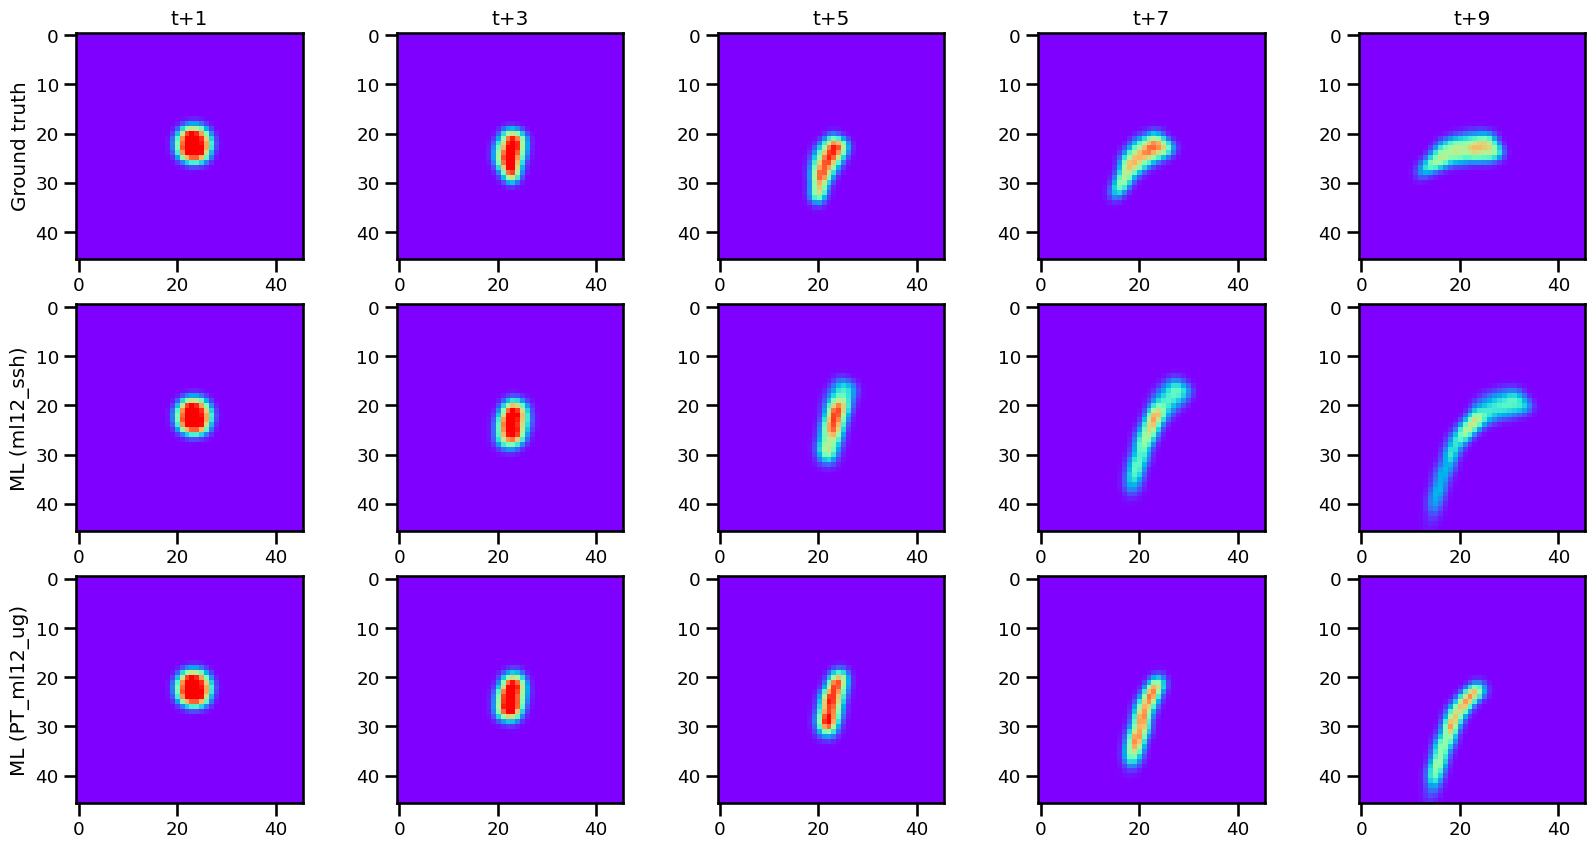

In [3]:


gt, ml12ug, ssh  =myfuncts.load_tst1()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    # axs[0,j].imshow(gt[i],cmap=cm.rainbow, vmin=0, vmax=vm)
    # axs[1,j].imshow(ml12[i],cmap=cm.rainbow, vmin=0, vmax=vm)
    # axs[2,j].imshow(ssh[i],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ml12ug[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_ssh)')
axs[2,0].set_ylabel('ML (PT_ml12_ug)')
plt.show()

## Test 2: train 12_2conv with geo current

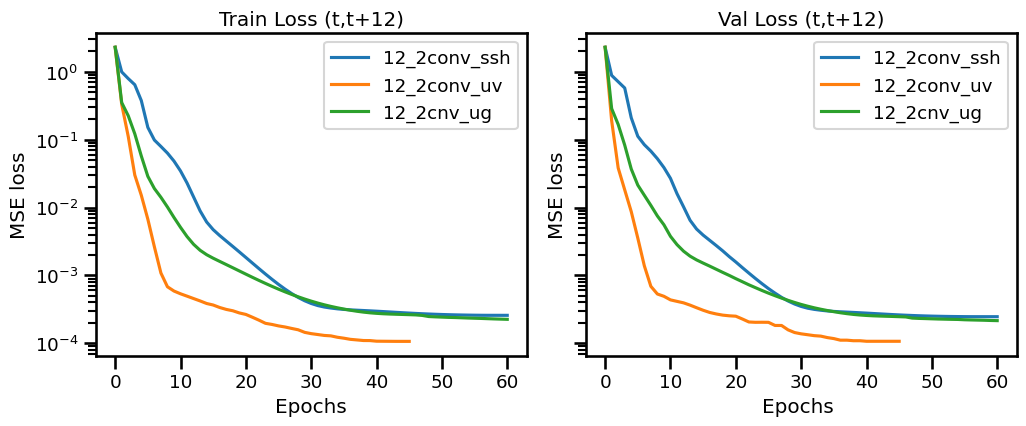

In [4]:

sims=myfuncts.load_tst2a()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)

ax1.title.set_text('Train Loss (t,t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss (t,t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()



plt.tight_layout()
plt.show()


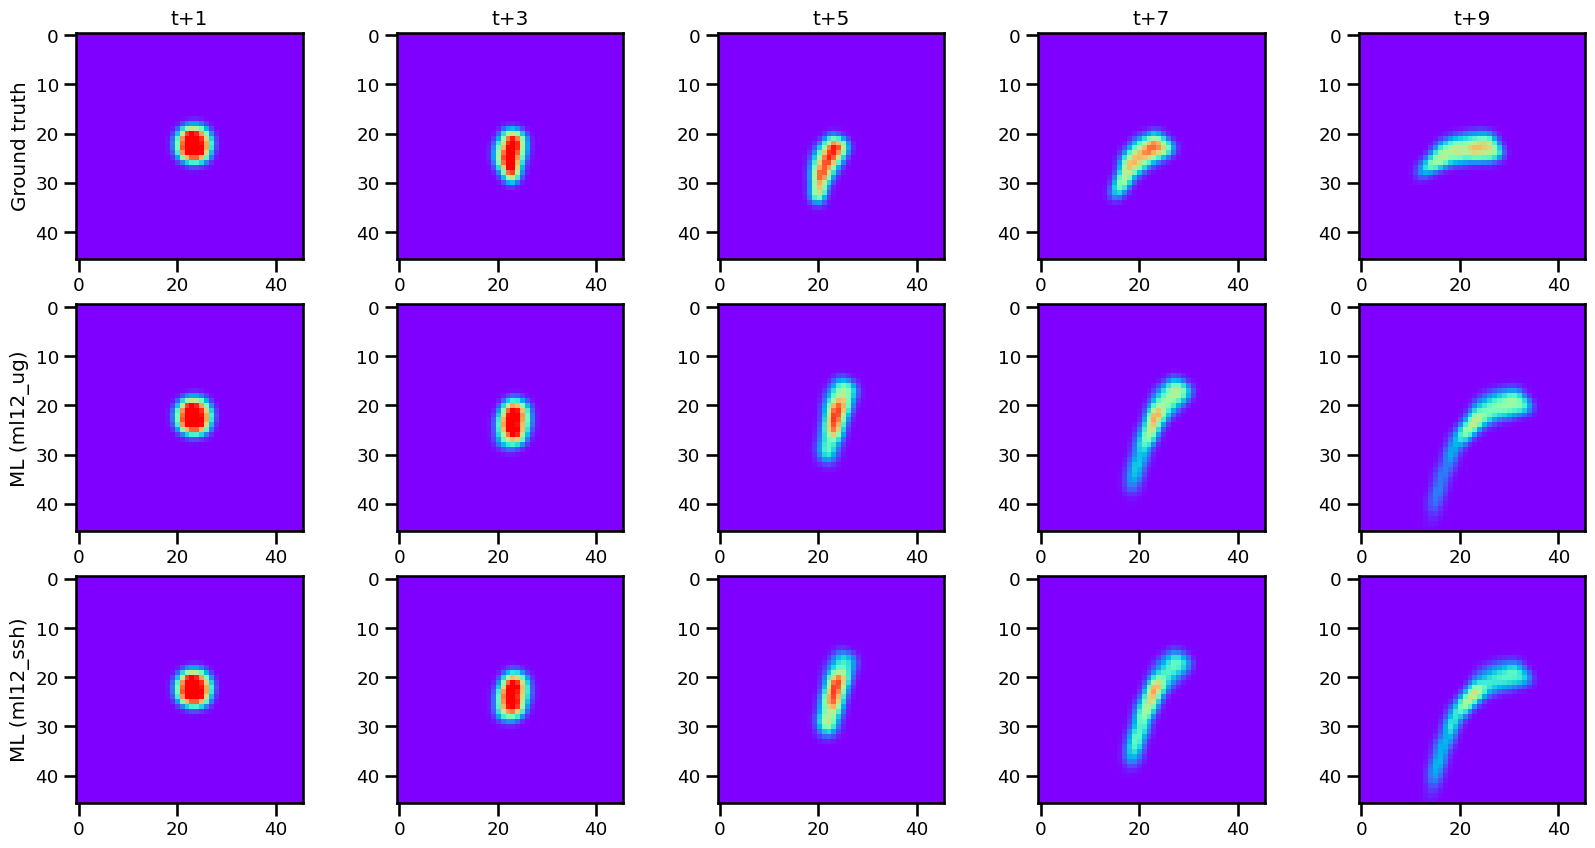

In [5]:


gt, ml12ug, ssh  =myfuncts.load_tst2b()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ml12ug[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_ug)')
axs[2,0].set_ylabel('ML (ml12_ssh)')
plt.show()

## Test 3: freez 12_2conv_uv and train 1st 2 layers with SSH


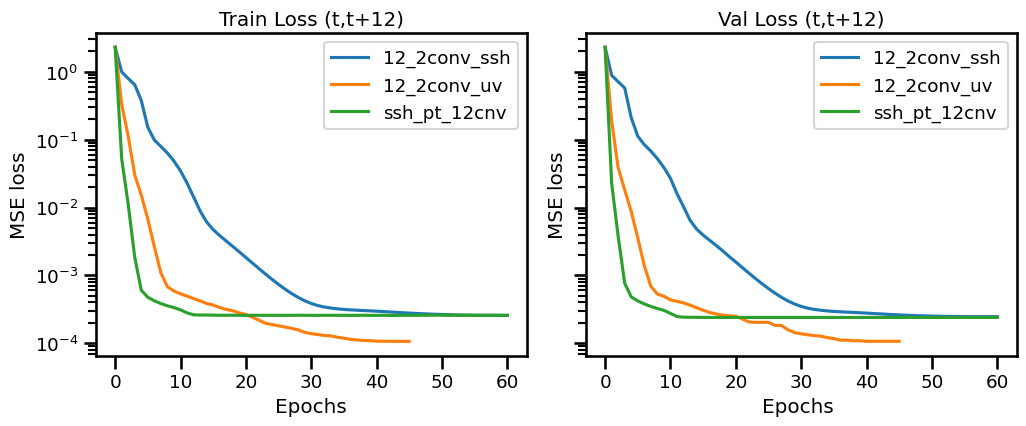

In [6]:

sims=myfuncts.load_tst3a()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)

ax1.title.set_text('Train Loss (t,t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss (t,t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()



plt.tight_layout()
plt.show()


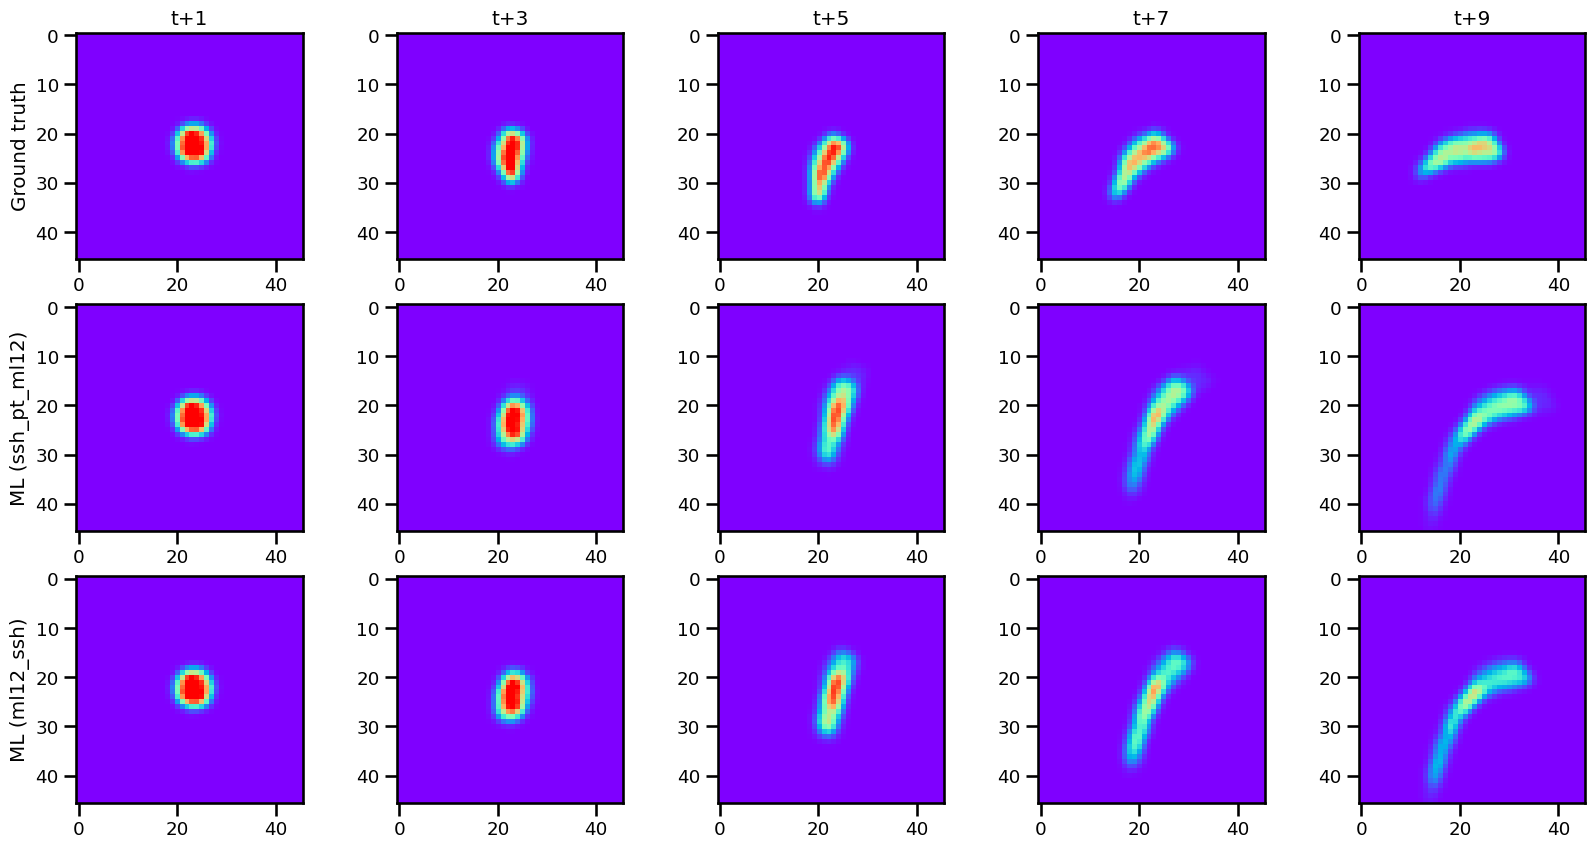

In [7]:


gt, ssh_pt_ml12, ssh  =myfuncts.load_tst3b()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh_pt_ml12[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ssh_pt_ml12)')
axs[2,0].set_ylabel('ML (ml12_ssh)')
plt.show()

## Test 4: add additional layers to ssh training 

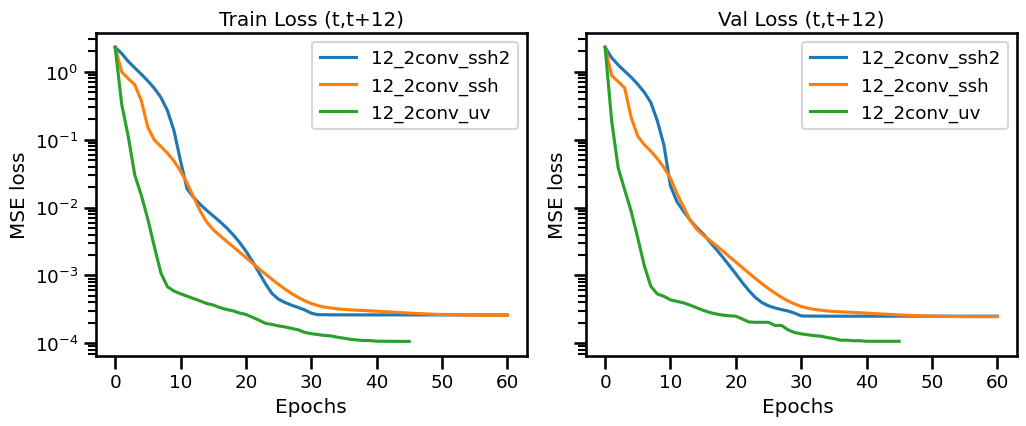

In [8]:

sims=myfuncts.load_tst4a()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)

ax1.title.set_text('Train Loss (t,t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss (t,t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()



plt.tight_layout()
plt.show()


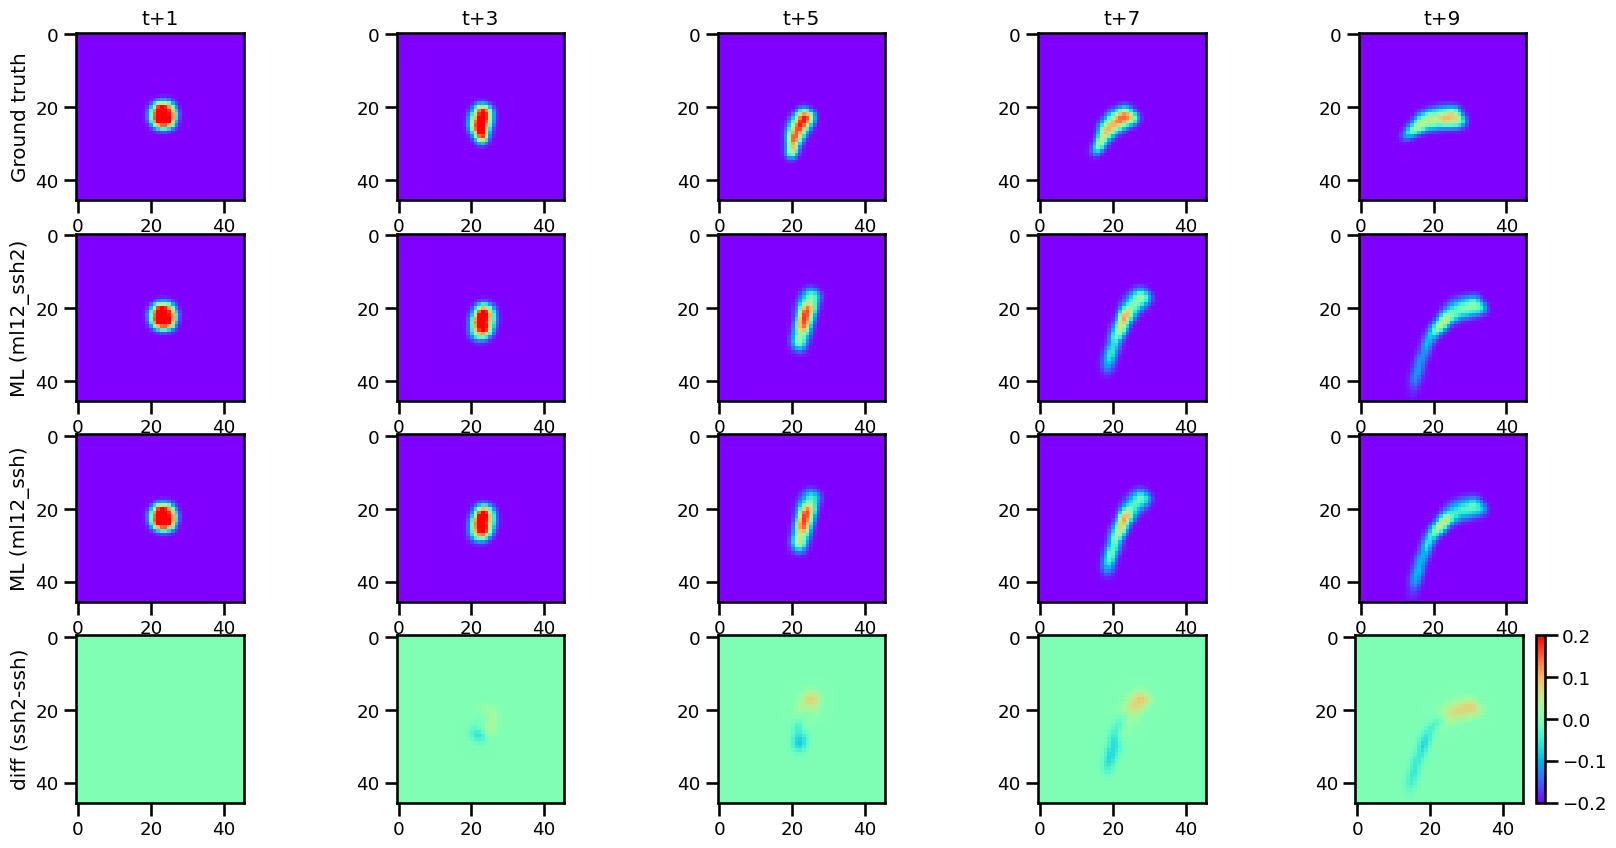

In [9]:


gt, ssh2, ssh  =myfuncts.load_tst4b()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh2[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    ii=axs[3,j].imshow((ssh2-ssh)[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=-0.2, vmax=0.2)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_ssh2)')
axs[2,0].set_ylabel('ML (ml12_ssh)')
axs[3,0].set_ylabel('diff (ssh2-ssh)')
plt.colorbar(ii, ax=axs[3,4])
    
plt.show()

# test5 Are u and u_geo too comparable?

- Create probability densities with same initial conditions but each time from u and ug

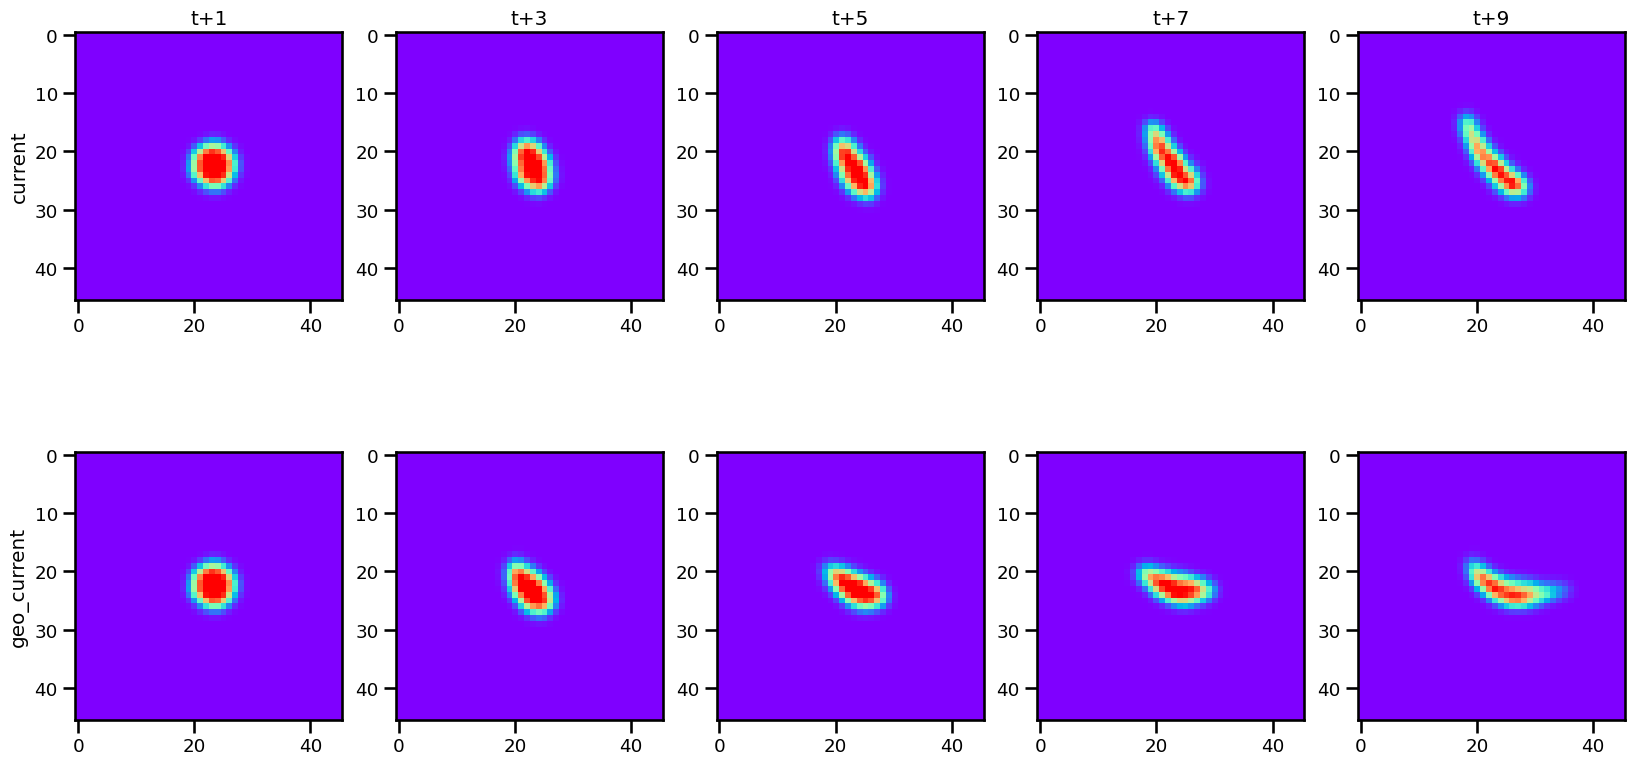

In [10]:


u, ug  =myfuncts.load_uvg()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(ug[i], axis=None), ug[i].shape)
    ind2 = np.unravel_index(np.argmax(u[i], axis=None), u[i].shape)
    axs[0,j].imshow(ug[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(u[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('current')
axs[1,0].set_ylabel('geo_current')
plt.show()

# My thoughts:

- We are not able to reproduce the gt because we are at the eng using Geo_current that are different from current
- Not enough data/(layers?) to learn u_geo---> u
- Maybe learn u_geo--->u? then use pretrained model? 

![Drag Racing](figs/12_2conv.png)




